In [14]:
from pythtb import tb_model
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
lat=[[1.0, 0.0,0.0],[0.0, 0.0,1.0]]
orb=[[0.,0.,0.] for _ in range(1)]

my_model=tb_model(dim_r=3,dim_k=1,lat=lat,orb=orb)  

my_model.set_onsite([0]) #make sure



In [ ]:
for neighbor in [ [1,0], [0,1]]:
    my_model.set_hop(-0.5, 0, 0, neighbor) 
    my_model.set_hop(-0.25, 3, 3, neighbor)
#check sethop
my_model.set_hop(+0.25, 1, 1, [1,0])
k_label=[r"$\Gamma$",r"$X$", r"$M$", r"$\Gamma$"]
path=[[0.0,0.0], [0.5,0.0], [0.5, 0.5], [0.0,0.0]]
(k_vec,k_dist,k_node)=my_model.k_path(path,100)

evals=my_model.solve_all(k_vec)


In [ ]:

# plot band structure
fig, ax = plt.subplots()
for band in evals:
    ax.plot(k_dist, band)
ax.set_title("s and p orbitals on 2d square lattice")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")
ax.set_xticks(k_node)
ax.set_xticklabels(k_label)
ax.set_xlim(k_node[0],k_node[-1])
for n in range(len(k_node)):
  ax.axvline(x=k_node[n], linewidth=0.5, color='k')
fig.tight_layout()
fig.savefig("s_and_p.pdf")

----- k_path report begin ----------
real-space lattice vectors
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
k-space metric tensor
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
internal coordinates of nodes
 [[0.  0.  0. ]
 [0.5 0.5 0.5]
 [0.  0.  0. ]]
reciprocal-space lattice vectors
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
cartesian coordinates of nodes
 [[0.  0.  0. ]
 [0.5 0.5 0.5]
 [0.  0.  0. ]]
list of segments:
  length = 0.86603  from  [0. 0. 0.]  to  [0.5 0.5 0.5]
  length = 0.86603  from  [0.5 0.5 0.5]  to  [0. 0. 0.]
node distance list: [0.      0.86603 1.73205]
node index list:    [ 0 50 99]
----- k_path report end ------------



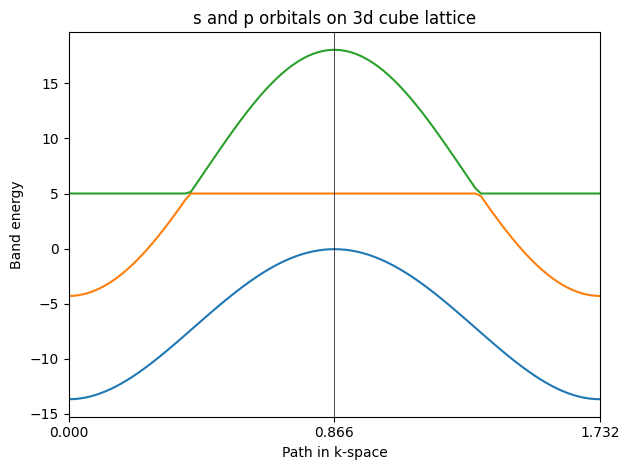

In [119]:
from pythtb import tb_model
import matplotlib.pyplot as plt
import random
lat=[[1.0, 0.0,0.0],[0.0, 1.0,0.0],[0.0,0.0,1.0]] #lattice vectors
#orb=[[0.,0.,0.] for _ in range(4)]   #reduced coordinates for orbitals
orb = [[0.1,0.9,0.3],
       [0.7,0.5,0.2],
       [0.8,0.3,1.]]
my_model=tb_model(dim_r=3,dim_k=3,lat=lat,orb=orb,nspin=1)

# define on_site energy
my_model.set_onsite([-5,5,5])
for neighbor in lat:
    my_model.set_hop(-1, 0, 0, neighbor) # s
for i in range(1,3):
   for j in range(0,3):
      for ax in lat:
        if max(ax)<=1:
          my_model.set_hop(-1, i , j , ax)
        else:
           break

k_label=[r"$\Gamma$",r"$X$", r"$M$", r"$\Gamma$"]
path=[[0.0,0.0,0.0],[0.5,0.5,0.5],[0,0,0]]
(k_vec,k_dist,k_node)=my_model.k_path(path,100)

evals=my_model.solve_all(k_vec)

fig, ax = plt.subplots()
for band in evals:
    ax.plot(k_dist, band)
ax.set_title("s and p orbitals on 3d cube lattice")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")
ax.set_xticks(k_node)
ax.set_xlim(k_node[0],k_node[-1])
for n in range(len(k_node)):
  ax.axvline(x=k_node[n], linewidth=0.5, color='k')
fig.tight_layout()
fig.savefig("s_and_p.pdf")

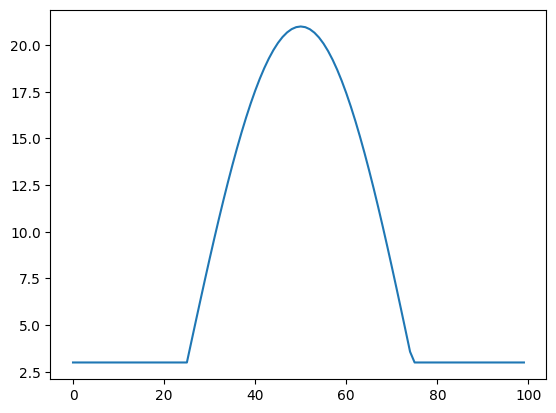

In [83]:
def average(lst): 
    return sum(lst) / len(lst)
a_evals = []
min = 9999
max = -9999
min_index,max_index = -1
for i in range(0,3):
    a_evals[i]=average(evals[i])
    if (evals[i]<min):
        min_index = i
    if(evals[i]>max):
        max_index = i
gap_en = min(evals)
#plt.plot(evals[2])
#plt.show()

In [ ]:
# visualize infinite model
(fig,ax)=my_model.visualize(0,1)
ax.set_title("bulk")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
fig.tight_layout()
fig.savefig("visualize_bulk.pdf")
# cutout finite model along direction 0
cut_one=my_model.cut_piece(8,0,glue_edgs=False)
#
(fig,ax)=cut_one.visualize(0,1)
ax.set_title("ribbon")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
fig.tight_layout()
fig.savefig("visualize_ribbon.pdf")

# cutout finite model along direction 1 as well
cut_two=cut_one.cut_piece(8,1,glue_edgs=False)
#
(fig,ax)=cut_two.visualize(0,1)
ax.set_title("finite")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
fig.tight_layout()
fig.savefig("visualize_finite.pdf")

In [ ]:
lat=[[1.0,0.0],[0.0,1.0]]
# positions of orbitals
orb=[[0.0,0.0],[.5,.5]]
# define the model
my_model=tb_model(2,2,lat,orb)
# assign onsite energy
my_model.set_onsite([1.0,-1.0])
# assign hopping terms
t=1.0
t2=1.0
# x-hopping within sublattice of orbital "0"
my_model.set_hop(-t, 0, 0, [1.0,0])
# y-hopping within sublattice of orbital "0"
my_model.set_hop(-t, 0, 0, [0,1.0])
# x-hopping within sublattice of orbital "1"
my_model.set_hop(-t, 1, 1, [1.0,0])
# y-hopping within sublattice of orbital "1"
my_model.set_hop(-t, 1, 1, [0,1.0])
# four inter-sublattice hopping terms, from "0" to "1"
my_model.set_hop(-t2, 0, 1, [0.0,0.0])
my_model.set_hop(-t2, 0, 1, [-1.0,0.0])
my_model.set_hop(-t2, 0, 1, [-1.0,-1.0])
my_model.set_hop(-t2, 0, 1, [0.0,-1.0])
# define a path in k-space to plot
path=[[0.0,0.0],[.5,0],[.5,.5],[0.0,0.0]]
# label k points
(k_vec,k_dist,k_node)=my_model.k_path(path,1000)

# solve model
evals=my_model.solve_all(k_vec)
label=(r'$\Gamma$',r'$X$',r'$M$',r'$\Gamma$')
# number of steps bet

In [ ]:
plt.plot(evals[0])
plt.plot(evals[1])
plt.show()

In [78]:
import seekpath
cell =  [[1.0,0.0,0.0],
        [0.0,1.0,0.0],
        [0.0,0.0,1.0]]
pos = [[-0.9,0.9,0.9],
       [0.5,0.5,0.5],
       [0.9,0.9,0.9]]
num = [1,2,3]
structure = (cell,pos,num)

seekpath.getpaths.get_explicit_k_path(structure,with_time_reversal = True, recipe = 'hpkot', threshold=1e-07, symprec=1e-05, angle_tolerance=-1.0)

{'point_coords': {'GAMMA': [0.0, 0.0, 0.0],
  'Y': [0.5, 0.5, 0.0],
  'A': [0.0, 0.0, 0.5],
  'M': [0.5, 0.5, 0.5],
  'V_2': [0.0, 0.5, 0.0],
  'L_2': [0.0, 0.5, 0.5],
  'F': [-0.5, 0.5, 0.5],
  'F_2': [0.5, 0.5, 0.5],
  'F_4': [0.5, 0.5, 0.5],
  'H': [-0.5, 0.5, 0.49999999999999994],
  'H_2': [0.5, 0.5, 0.5],
  'H_4': [0.5, -0.5, 0.5],
  'G': [-0.5, 0.5, -2.1648901405887332e-17],
  'G_2': [0.5, 0.5, 2.1648901405887332e-17],
  'G_4': [0.5, -0.5, 2.1648901405887332e-17],
  'G_6': [0.5, 0.5, -2.1648901405887332e-17]},
 'path': [('GAMMA', 'Y'),
  ('Y', 'M'),
  ('M', 'A'),
  ('A', 'GAMMA'),
  ('L_2', 'GAMMA'),
  ('GAMMA', 'V_2')],
 'has_inversion_symmetry': False,
 'augmented_path': False,
 'bravais_lattice': 'mC',
 'bravais_lattice_extended': 'mC2',
 'conv_lattice': array([[1.41421356e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.41421356e+00, 0.00000000e+00],
        [6.12323400e-17, 0.00000000e+00, 1.00000000e+00]]),
 'conv_positions': array([[0.9, 0. , 0.1],
        